<a href="https://colab.research.google.com/github/pertvirt/hello_world/blob/master/Reverse_Image_Seach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!unzip data

In [0]:
from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [0]:
imgs_path = "/content/data"
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 10 # number of most similar images to retrieve

In [7]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()





553467904/553467096 [==============================] - 17s 0us/step






Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_______________________________________________

In [11]:
# files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" in x]
import glob

files = glob.glob("/content/data/**/*.jpg", recursive=True)

print("Total images:",len(files))

Total images: 213


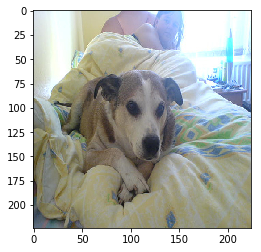

image loaded successfully!


In [12]:
# load image resized
original = load_img(files[2], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("image loaded successfully!")

In [13]:
numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

image batch size (1, 224, 224, 3)


In [0]:
# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())

In [15]:
# get the extracted features
img_features = feat_extractor.predict(processed_image)

print("features successfully extracted!")
print("number of image features:",img_features.size)
img_features

features successfully extracted!
number of image features: 4096


array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [17]:
# extract the images features

imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(213, 4096)

In [18]:
# compute cosine similarities between images

cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

,/content/data/dog/2008_001220.jpg,/content/data/dog/2008_000053.jpg,/content/data/dog/2008_004044.jpg,/content/data/dog/2008_000706.jpg,/content/data/dog/2008_000138.jpg,/content/data/dog/2008_004498.jpg,/content/data/dog/2008_007537.jpg,/content/data/dog/2008_007478.jpg,/content/data/dog/2008_001070.jpg,/content/data/dog/2008_000808.jpg,/content/data/dog/2008_001285.jpg,/content/data/dog/2008_000641.jpg,/content/data/dog/2008_003852.jpg,/content/data/dog/2008_005563.jpg,/content/data/dog/2008_005240.jpg,/content/data/dog/2008_005160.jpg,/content/data/dog/2008_005798.jpg,/content/data/dog/2008_007519.jpg,/content/data/dog/2008_004528.jpg,/content/data/dog/2008_000897.jpg,/content/data/dog/2008_000270.jpg,/content/data/dog/2008_007567.jpg,/content/data/dog/2008_001479.jpg,/content/data/dog/2008_000620.jpg,/content/data/tv_monitor/2008_002328.jpg,/content/data/tv_monitor/2008_004665.jpg,/content/data/tv_monitor/2008_007987.jpg,/content/data/tv_monitor/2008_004506.jpg,/content/data/tv_monitor/2008_005639.jpg,/content/data/tv_monitor/2008_001688.jpg,/content/data/tv_monitor/2008_002817.jpg,/content/data/tv_monitor/2008_001920.jpg,/content/data/tv_monitor/2008_007916.jpg,/content/data/tv_monitor/2008_005817.jpg,/content/data/tv_monitor/2008_002547.jpg,/content/data/tv_monitor/2008_008269.jpg,/content/data/tv_monitor/2008_000305.jpg,/content/data/tv_monitor/2008_001461.jpg,/content/data/tv_monitor/2008_001641.jpg,/content/data/tv_monitor/2008_004550.jpg,...,/content/data/sheep/2008_008668.jpg,/content/data/sheep/2008_008613.jpg,/content/data/sheep/2008_008601.jpg,/content/data/sheep/2008_002430.jpg,/content/data/sheep/2008_008666.jpg,/content/data/sheep/2008_007677.jpg,/content/data/sheep/2008_004007.jpg,/content/data/sheep/2008_003147.jpg,/content/data/sheep/2008_004453.jpg,/content/data/sheep/2008_008623.jpg,/content/data/sheep/2008_007430.jpg,/content/data/sheep/2008_007693.jpg,/content/data/sheep/2008_006070.jpg,/content/data/sheep/2008_005736.jpg,/content/data/sheep/2008_005938.jpg,/content/data/sheep/2008_004292.jpg,/content/data/sheep/2008_007245.jpg,/content/data/sheep/2008_007497.jpg,/content/data/sheep/2008_006059.jpg,/content/data/sheep/2008_006100.jpg,/content/data/motorbike/2008_007184.jpg,/content/data/motorbike/2008_008450.jpg,/content/data/motorbike/2008_008391.jpg,/content/data/motorbike/2008_005213.jpg,/content/data/motorbike/2008_001691.jpg,/content/data/motorbike/2008_007241.jpg,/content/data/motorbike/2008_002804.jpg,/content/data/motorbike/2008_005429.jpg,/content/data/motorbike/2008_005427.jpg,/content/data/motorbike/2008_006345.jpg,/content/data/motorbike/2008_008227.jpg,/content/data/motorbike/2008_008177.jpg,/content/data/motorbike/2008_008246.jpg,/content/data/motorbike/2008_007138.jpg,/content/data/motorbike/2008_007313.jpg,/content/data/motorbike/2008_007344.jpg,/content/data/motorbike/2008_002752.jpg,/content/data/motorbike/2008_005902.jpg,/content/data/motorbike/2008_002948.jpg,/content/data/motorbike/2008_002926.jpg
/content/data/dog/2008_001220.jpg,1.000000,0.367390,0.252322,0.315693,0.202427,0.172898,0.243303,0.167747,0.133305,0.187744,0.197448,0.208570,0.185377,0.206432,0.237535,0.307441,0.332804,0.435927,0.289316,0.158291,0.265236,0.268173,0.285494,0.191114,0.166675,0.173721,0.177664,0.203727,0.173875,0.172347,0.142458,0.123231,0.198073,0.235542,0.278764,0.226477,0.176835,0.213998,0.179551,0.245961,...,0.205075,0.135476,0.169547,0.155831,0.255931,0.187796,0.256278,0.145653,0.278292,0.173857,0.224082,0.150533,0.189437,0.329002,0.243239,0.171349,0.161182,0.246313,0.235926,0.242206,0.136047,0.101143,0.150009,0.076659,0.107163,0.109892,0.135963,0.144972,0.102022,0.202090,0.178026,0.129130,0.141111,0.132468,0.154786,0.211607,0.153398,0.177775,0.160023,0.204768
/content/data/dog/2008_000053.jpg,0.367390,1.000000,0.290102,0.256077,0.174650,0.161014,0.173147,0.226425,0.153599,0.329932,0.130139,0.183125,0.186200,0.122809,0.111893,0.235763,0.296373,0.240517,0.236882,0.148043,0.268059,0.201484,0.187480,0.23

In [0]:
# function to retrieve the most similar images for a given one

def retrieve_most_similar_images(given_img):

    print("-----------------------------------------------------------------------")
    print("Image Query:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("Image results based on cosine similarity:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
Image Query:


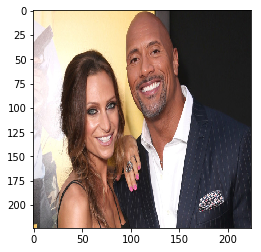

-----------------------------------------------------------------------
Image results based on cosine similarity:


KeyError: ignored

In [26]:
# retrieve the most N similar images
files.append("/content/1.jpg")
retrieve_most_similar_images(files[213])